# 15 Opening Leapfrog Meshes and GoCAD TSurfaces with GemGIS

Several different modeling packages store their data in different data types. The following illustrates how to load Leapfrog meshes (.msh-files) and GoCAD TSurfaces (.ts-files) with GemGIS and convert them to a plotable PyVista format.


<img src="../images/tutorial15_cover.png">

## Set File Paths

If you downloaded the latest `GemGIS` from the Github repository, append the path so that the package can be imported successfully. In addition, the file path to the files within the `gemgis_data` folder is set. You can download the data [here](https://github.com/cgre-aachen/gemgis_data/archive/master.zip) if you have not done so.

In [1]:
import sys
sys.path.append('../../../../gemgis')
file_path ='../../../../gemgis_data/data/15_opening_leapfrog_meshes_and_gocad_tsurfaces/'

## Reading Leapfrog Meshes

### Loading the Mesh Data

The Leapfrog mesh (.msh) is loaded and parsed with ``read_msh(..)``. A dictionary containing the face and vertex data will be returned.

In [2]:
import gemgis as gg
import numpy as np

data = gg.raster.read_msh(file_path + 'GM_Granodiorite.msh')

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
data

{'Tri': array([[    0,     1,     2],
        [    0,     3,     1],
        [    4,     3,     0],
        ...,
        [53677, 53672, 53680],
        [53679, 53677, 53680],
        [53673, 53672, 53677]]),
 'Location': array([[ 1.44625109e+06,  5.24854344e+06, -1.12743862e+02],
        [ 1.44624766e+06,  5.24854640e+06, -1.15102216e+02],
        [ 1.44624808e+06,  5.24854657e+06, -1.15080548e+02],
        ...,
        [ 1.44831008e+06,  5.24896679e+06, -1.24755449e+02],
        [ 1.44830385e+06,  5.24896985e+06, -1.33694397e+02],
        [ 1.44829874e+06,  5.24897215e+06, -1.42506587e+02]])}

In [4]:
data.keys()

dict_keys(['Tri', 'Location'])

### Converting Mesh Data to PyVista PolyData

The loaded data will now be converted to PyVista PolyData using ``create_polydata_from_msh(..)``.

In [5]:
surf = gg.visualization.create_polydata_from_msh(data)
surf

PolyData (0x2043d386a00)
  N Cells:	107358
  N Points:	53681
  X Bounds:	1.444e+06, 1.449e+06
  Y Bounds:	5.246e+06, 5.249e+06
  Z Bounds:	-2.464e+02, 7.396e+02
  N Arrays:	1

### Plotting the data

Once converted, the data can easily be plotted using PyVista.

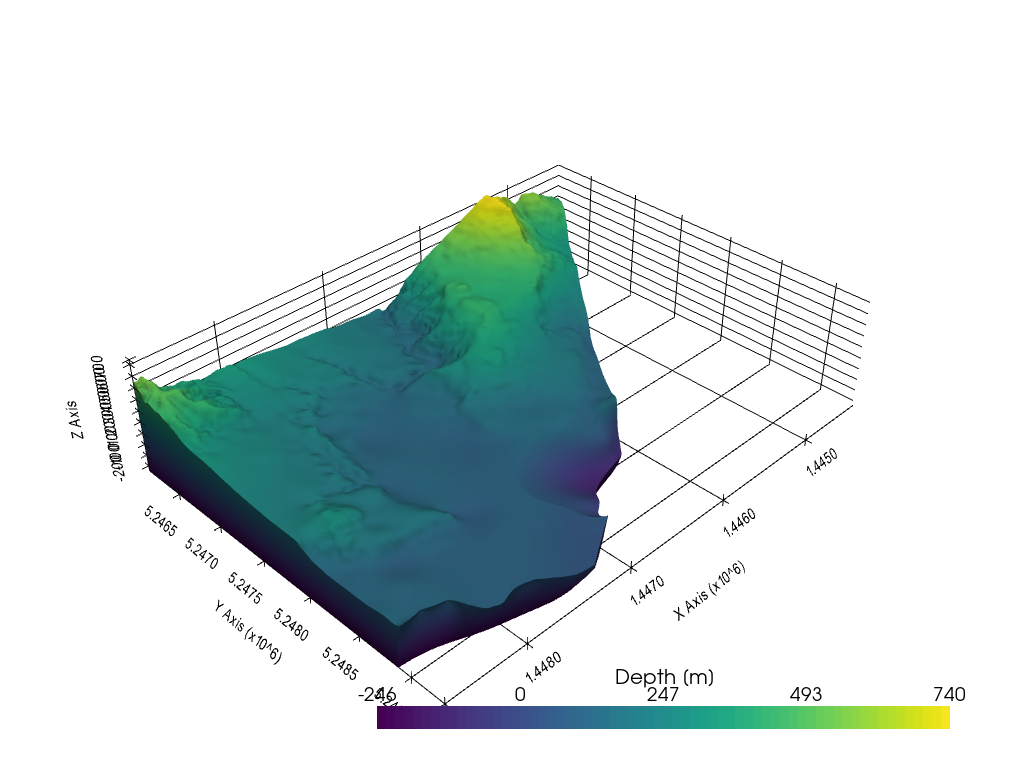

In [6]:
import pyvista as pv 
sargs = dict(fmt="%.0f", color='black')
p = pv.Plotter()

p.add_mesh(surf, scalar_bar_args=sargs)

p.show_grid(color='black')
p.set_background(color='white')
p.show()

## Reading GoCAD TSurfaces

### Loading the Mesh Data

The GoCAD mesh (.ts) is loaded and parsed with ``read_ts(..)``. An array containing the face data and a DataFrame containing the vertex data will be returned.

In [7]:
import gemgis as gg
import numpy as np

data = gg.raster.read_ts(file_path + 'KVB_12_Hermann_Katharina.ts')

In [8]:
data[0]

,id,X,Y,Z,aproz,blk,fl,flko,flz1,flz2,grs,id_gocad,kenn,vol,vola
0,0,297077.41,5677487.26,-838.50,0,672132,5.01,63,1777,277,672,6721321830000.00,1,3156.85,3156.85
1,1,297437.54,5676992.09,-816.61,0,672132,5.01,63,1777,277,672,6721321830000.00,1,3156.85,3156.85
2,2,298816.17,5677906.68,-590.82,0,672132,5.01,63,1777,277,672,6721321830000.00,1,3156.85,3156.85
3,3,298031.07,5678779.55,-648.69,0,672132,5.01,63,1777,277,672,6721321830000.00,1,3156.85,3156.85
4,4,298852.68,5678065.33,-578.15,0,672132,5.01,63,1777,277,672,6721321830000.00,1,3156.85,3156.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40338,40338,346068.13,5707568.04,-502.92,0,325443,0.00,169,1762,577,325,3254431780000.00,10,230.49,0.00
40339,40339,346635.72,5708475.40,-670.50,0,325413,0.00,169,1762,577,325,3254131880000.00,10,529.12,0.00
40340,40340,345647.00,5708035.62,-668.86,0,325413,0.00,169,1762,577,325,3254131880000.00,10,529.12,0.00
40341,40341,345877.34,5707796.02,-613.41,0,325423,0.00,169,1762,577,325,3254231760000.00,10,672.43,0.00


In [9]:
data[1]

array([[    0,     1,     2],
       [    3,     2,     4],
       [    1,     5,     6],
       ...,
       [40335, 40338, 40336],
       [40339, 40340, 40341],
       [40341, 40342, 40339]])

### Converting Mesh Data to PyVista PolyData

The loaded data will now be converted to PyVista PolyData using ``create_polydata_from_ts(..)``.

In [10]:
surf = gg.visualization.create_polydata_from_ts(data=data)
surf.save(file_path + 'mesh.vtk')
surf

PolyData (0x2044cf75dc0)
  N Cells:	29273
  N Points:	40343
  X Bounds:	2.804e+05, 5.161e+05
  Y Bounds:	5.640e+06, 5.833e+06
  Z Bounds:	-8.067e+03, 1.457e+02
  N Arrays:	1

### Plotting the data

Once converted, the data can easily be plotted using PyVista.

In [17]:
import pyvista as pv 
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=False)

p.add_mesh(surf, scalar_bar_args=sargs)

p.show_grid(color='black')
p.set_background(color='white')
p.show()

[(459116.5144132721, 5681014.842639659, 389577.91214944364),
 (403369.2632037626, 5734564.770081494, -4920.076330218427),
 (0.06683611716562837, 0.9899120981855276, 0.1249278644184274)]

### Extracting Polygons from Faces

If you would like to display your mesh data or in particular the faces in a GIS, the faces can be converted to Shapely Polygons using ``create_polygons_from_faces(..)``. However, each connected surface is now divided in these triangles. The next step is to unify/merge the triangles that belonged to one surface before.

In [12]:
polygons = gg.vector.create_polygons_from_faces(mesh=surf, crs='EPSG:25832')
polygons

,geometry
0,"POLYGON Z ((297077.414 5677487.262 -838.496, 2..."
1,"POLYGON Z ((298031.070 5678779.547 -648.688, 2..."
2,"POLYGON Z ((297437.539 5676992.094 -816.608, 2..."
3,"POLYGON Z ((298031.070 5678779.547 -648.688, 2..."
4,"POLYGON Z ((295827.680 5680951.574 -825.328, 2..."
...,...
29268,"POLYGON Z ((344329.793 5706418.469 -393.606, 3..."
29269,"POLYGON Z ((345667.453 5707314.279 -470.917, 3..."
29270,"POLYGON Z ((345667.453 5707314.279 -470.917, 3..."
29271,"POLYGON Z ((346635.723 5708475.404 -670.504, 3..."


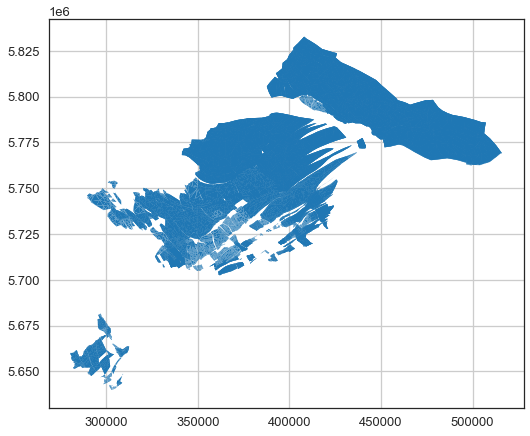

In [13]:
import matplotlib.pyplot as plt

polygons.plot()
plt.grid()

## Merging Triangles to Polygons

Adjacent triangle can now be merged to form single larger polygons using ``unify_polygons(..)``. 

**NB: Currently, Polygons overlapping in their Z dimension are being connected as the underlying Shapely ``unary_union(..)`` function does not account for these overlaps. This was mentioned here: https://github.com/Toblerity/Shapely/issues/1062.**

In [16]:
polygons = polygons[polygons.is_valid]
polygons_merged = gg.vector.unify_polygons(polygons=polygons)
polygons_merged

,geometry
0,"POLYGON Z ((396733.222 5714544.109 -186.252, 3..."
1,"POLYGON Z ((390252.635 5712409.037 -543.142, 3..."
2,"POLYGON Z ((391444.965 5710989.453 -516.000, 3..."
3,"POLYGON Z ((388410.007 5710903.900 -85.654, 38..."
4,"POLYGON Z ((384393.963 5714293.104 -614.106, 3..."
...,...
281,"POLYGON Z ((412744.875 5794677.059 -1696.400, ..."
282,"POLYGON Z ((412206.525 5795051.721 -1732.443, ..."
283,"POLYGON Z ((410893.082 5797304.859 -1490.000, ..."
284,"POLYGON Z ((415276.738 5797593.211 -1930.020, ..."


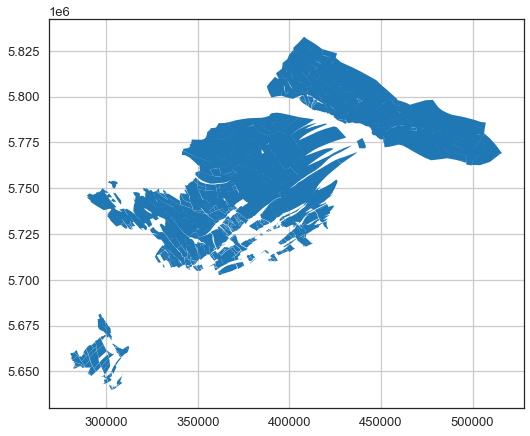

In [15]:
polygons_merged.plot()
plt.grid()